In [23]:
import os, shutil
from keras.preprocessing import image
import numpy as np

import os
import PIL
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# Seeing how many images are in each folder

In [5]:
train_mild_dir = '../../src/data/train/MildDemented'
train_moderate_dir = '../../src/data/train/ModerateDemented'
train_nondemented_dir = '../../src/data/train/NonDemented'
train_verymild_dir = '../../src/data/train/VeryMildDemented'

val_mild_dir = '../../src/data/val/MildDemented'
val_moderate_dir = '../../src/data/val/ModerateDemented'
val_nondemented_dir = '../../src/data/val/NonDemented'
val_verymild_dir = '../../src/data/val/VeryMildDemented'

test_mild_dir = '../../src/data/test/MildDemented'
test_moderate_dir = '../../src/data/test/ModerateDemented'
test_nondemented_dir = '../../src/data/test/NonDemented'
test_verymild_dir = '../../src/data/test/VeryMildDemented'

In [6]:
# see how many pictures are in each directory
print(f' Train Mild: {len(os.listdir(train_mild_dir))}')
print(f' Train Moderate: {len(os.listdir(train_moderate_dir))}')
print(f' Train Normal: {len(os.listdir(train_nondemented_dir))}')
print(f' Train Very Mild: {len(os.listdir(train_verymild_dir))}')

print(f' Val Mild: {len(os.listdir(val_mild_dir))}')
print(f' Val Moderate: {len(os.listdir(val_moderate_dir))}')
print(f' Val Normal: {len(os.listdir(val_nondemented_dir))}')
print(f' Val Very Mild: {len(os.listdir(val_verymild_dir))}')

print(f' Test Mild: {len(os.listdir(test_mild_dir))}')
print(f' Test Moderate: {len(os.listdir(test_moderate_dir))}')  
print(f' Test Normal: {len(os.listdir(test_nondemented_dir))}')
print(f' Test Very Mild: {len(os.listdir(test_verymild_dir))}')  

 Train Mild: 574
 Train Moderate: 41
 Train Normal: 2048
 Train Very Mild: 1434
 Val Mild: 144
 Val Moderate: 11
 Val Normal: 512
 Val Very Mild: 359
 Test Mild: 179
 Test Moderate: 12
 Test Normal: 640
 Test Very Mild: 448


# looking at single image

In [20]:
img_path = '../../src/data/train/NonDemented/nondem100.jpg'


img = image.load_img(img_path)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

(1, 208, 176, 3)


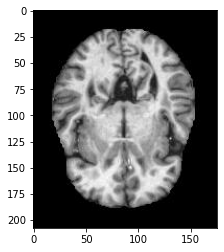

In [22]:
#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '../../src/data/train',
  seed=123)

Found 4101 files belonging to 4 classes.


In [27]:
class_names = train_ds.class_names

In [30]:
class_names

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [38]:
train_ds.take(1)

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
class_names

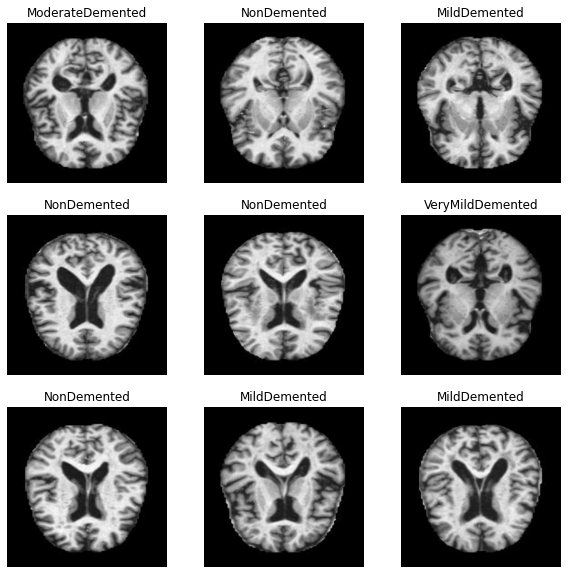

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
         ax = plt.subplot(3, 3, i + 1)
         plt.imshow(images[i].numpy().astype("uint8"))
         plt.title(class_names[labels[i]])
         plt.axis("off")